# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./data/WHO_COVID19_cases.csv')
df

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
58555,2024-08-04,ZW,Zimbabwe,Africa,AFRO,1.0,266387,NaN,5740
58556,2024-08-11,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58557,2024-08-18,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740
58558,2024-08-25,ZW,Zimbabwe,Africa,AFRO,NaN,266387,NaN,5740


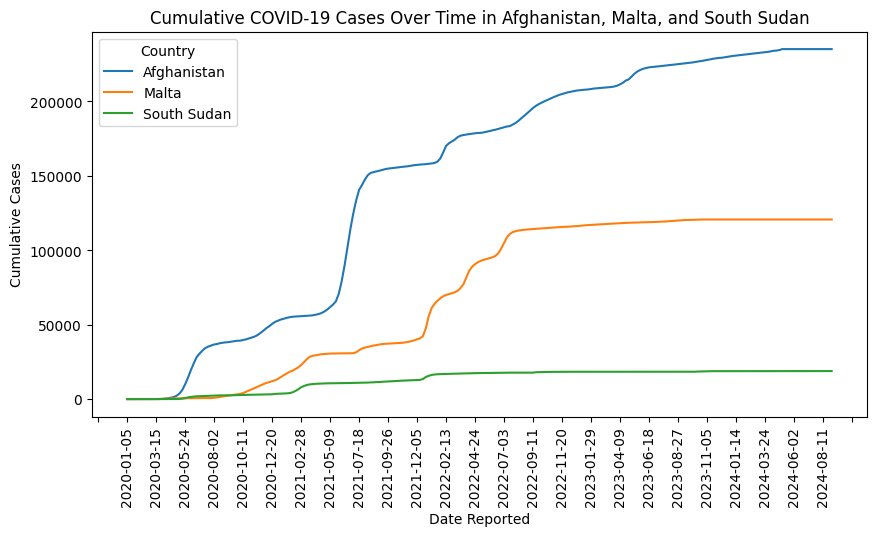

In [43]:
# Filter countries
selected_countries = ['Afghanistan', 'Malta', 'South Sudan']
df_filtered = df[df['Country'].isin(selected_countries)]

# Create a line plot using seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_filtered, x='Date_reported', y='Cumulative_cases', hue='Country')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))

# Add labels and title
plt.xlabel('Date Reported')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID-19 Cases Over Time in Afghanistan, Malta, and South Sudan')
plt.legend(title='Country')
#plt.tight_layout()

# Display plot
plt.show()

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

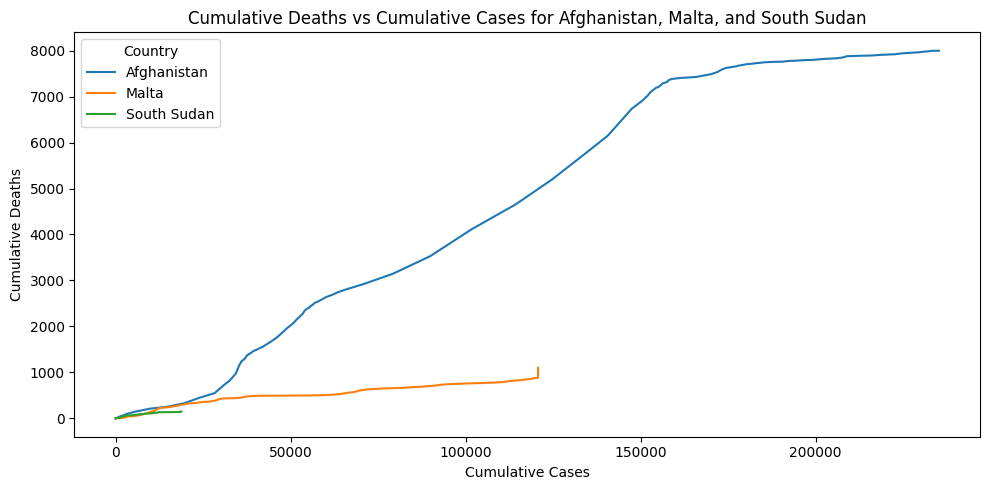

In [44]:
# Create a line plot using matplotlib
plt.figure(figsize=(10, 5))
for country in selected_countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.plot(country_data['Cumulative_cases'], country_data['Cumulative_deaths'], label=country)

# Add labels and title
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')
plt.title('Cumulative Deaths vs Cumulative Cases for Afghanistan, Malta, and South Sudan')
plt.legend(title='Country')
plt.tight_layout()

# Show the plot
plt.show()